## Section 6 - Evaluation Part 2
The following script presents the second use case from Section 6 – Evaluation part 2 in the manuscript where a batch of jobs data is dispatched from a .CSV file to varying number of ibm_strasbourg QPUs. 

In [2]:
### deploying jobs from CSV file. 

from QCloud import *
from collections import defaultdict
import numpy as np
import matplotlib.pyplot as plt

# Create quantum devices
ibm_strasbourg = IBM_Strasbourg(env=None, name="1", printlog = False)
ibm_strasbourg_2 = IBM_Strasbourg(env=None, name="2", printlog = False)
ibm_strasbourg_3 = IBM_Strasbourg(env=None, name="3", printlog = False)
ibm_strasbourg_4 = IBM_Strasbourg(env=None, name="4", printlog = False)
ibm_strasbourg_5 = IBM_Strasbourg(env=None, name="5", printlog = False)
ibm_strasbourg_6 = IBM_Strasbourg(env=None, name="6", printlog = False)
ibm_strasbourg_7 = IBM_Strasbourg(env=None, name="7", printlog = False)

devices = [ibm_strasbourg, ibm_strasbourg_2, ibm_strasbourg_3, ibm_strasbourg_4, ibm_strasbourg_5, ibm_strasbourg_6, ibm_strasbourg_7]
# devices = [ibm_strasbourg, ibm_strasbourg_2]
# Initialize and run the simulation using jobs from a CSV file

sim_hours = defaultdict(list)
exe_time = defaultdict(list)

for num_device in range(1,8): 
    for _ in range(10): 
        start_time = time.time()        
        qcloudsimenv = QCloudSimEnv(
            devices=devices[0:num_device],
            broker_class=ParallelBroker,
            job_feed_method="dispatcher",
            # file_path="jobs_data.csv"
            file_path="synth_job_batches/jobs_data.csv"
        )
        qcloudsimenv.run()
        
        end_time = time.time() # End the timer
        elapsed_time = end_time - start_time # Calculate elapsed time
        # print(qcloudsimenv.now)
        sim_hours[num_device].append(qcloudsimenv.now)        
        # print(f"Elapsed time: {elapsed_time:.5f} seconds")
        exe_time[num_device].append(round(elapsed_time,5))
    print(f"finish one loop for num devices: {num_device}")    
# Access job records after the simulation
# job_records = qcloudsimenv.job_records_manager.get_job_records()
# for job_id, events in job_records.items():
#     print(f"Job ID: {job_id}, Events: {events}")


finish one loop for num devices: 1
finish one loop for num devices: 2
finish one loop for num devices: 3
finish one loop for num devices: 4
finish one loop for num devices: 5
finish one loop for num devices: 6
finish one loop for num devices: 7


### Calculating Average sim-hour and Average execution time

In [4]:
avg_sim_hours = []
std_sim_hours = []
avg_exe_time = []
std_exe_time = []

for i in range(1, 8):
    # Compute the average (mean)
    avg_sim_hours.append(round(np.mean(sim_hours[i])/60, 4))
    avg_exe_time.append(np.mean(exe_time[i]))
    # Compute the standard deviation
    std_sim_hours.append(round(np.std(sim_hours[i])/60, 4))
    std_exe_time.append(np.std(exe_time[i]))


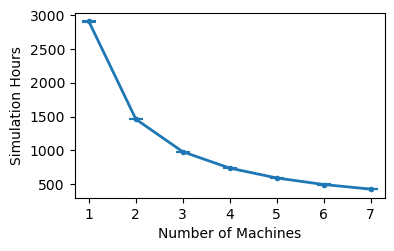

In [7]:
FONTSIZE = 10
# Data
num_machines = [1, 2, 3, 4, 5, 6, 7]
avg_sim_hours = avg_sim_hours
std_sim_hours = std_sim_hours

# Create the plot
plt.figure(figsize=(4, 2.4))
plt.errorbar(num_machines, avg_sim_hours, yerr=std_sim_hours, fmt='.-', 
             capsize=5, capthick=1.5, markersize=6, linewidth=2, label="Simulation Time")

# Labels and title
plt.xlabel("Number of Machines", fontsize=FONTSIZE)
plt.ylabel("Simulation Hours", fontsize=FONTSIZE)

plt.savefig("simulation_time_vs_machines.png")
# Show the plot
plt.show()

### Calculating total execution time

In [ ]:
total_mins = 0
for t in avg_exe_time: 
    total_mins +=(t*10/60)
print('Total Execution Time: ', total_minsa)